# Project 7: Statistical Analysis and Hypothesis Testing

In [ ]:
## This work involves working on data related to Cookie Cats – a hugely popular puzzle game. As players progress through the levels of the game, 
## they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. 
## In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, 
## hopefully resulting in the player's enjoyment of the game being increased and prolonged. 
## But where should the gates be placed and how the placement of the gates can retain the players for more time.
# Even though the overall subscription for the game is growing, 
#the revenue from in-game purchases has been declining and many players are uninstalling the game after playing for a few day
#The overall objective of the project is to test the company’s CEO’s hypothesis 
#that moving the first gate from level 30 to level 40 increases retention rate and the number of game rounds played

## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats.csv


In [ ]:
#Read data using pandas
import io
user_df = pd.read_csv(io.BytesIO(uploaded['cookie_cats.csv']))  
#user_df=pd.read_csv("C:/Users/HP/Documents/AINE_AI/Project7/cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [ ]:
#Check for any missing values in the data using isnull() function

user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

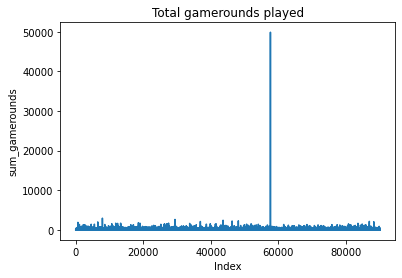

In [ ]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [ ]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

print("max value of sum_gamerrounds")
max_value= max(user_df.sum_gamerounds)
max_value

print("Index of the max value is")
index_value=user_df[user_df.sum_gamerounds.isin([max_value])].index.tolist()
index_value

user_df.drop(user_df.index[index_value],inplace=True)

max value of sum_gamerrounds


49854

Index of the max value is


[57702]

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

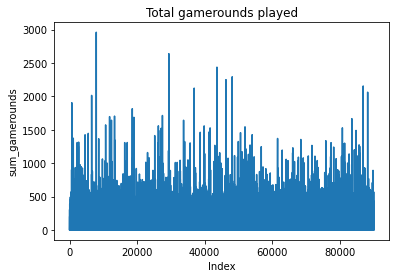

In [ ]:
#Plot the graph for sum_gamerounds player after removing the outlier

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [ ]:
#Insert calculation for 7-day retention rate

retention_rate_7= round(user_df.retention_7.sum()/user_df.shape[0]*100,2)   #rounds it to 2 points
print("Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overal 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [ ]:
# Find number of customers with sum_gamerounds is equal to zero

user_df[user_df.sum_gamerounds ==0].shape[0]

3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

Text(0.5, 0, 'sum_gamerounds')

Text(0, 0.5, 'Count of players')

Text(0.5, 1.0, 'Count of players vs sum_gamerounds')

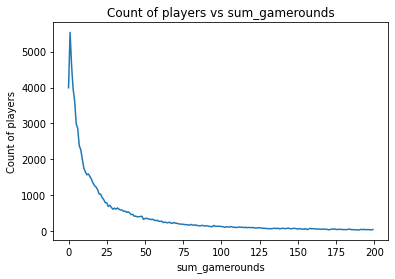

In [ ]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

new_data= user_df[["userid","sum_gamerounds"]].groupby("sum_gamerounds").count().reset_index().rename(columns={"userid":"count"})[0:200]
plt.xlabel("sum_gamerounds")
plt.ylabel("Count of players")
plt.title("Count of players vs sum_gamerounds")
plt.plot(new_data["sum_gamerounds"],new_data["count"])

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [ ]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
Type your interpretation here from the crosstab generated above   
There is a negligible difference between the 2 groups, but we need to show it statistically. It shows the majority (approx 80%) stopped playing after 7 days in both cases. 

### Q3.2 Gamerounds summary for different game versions

In [ ]:
#use pandas group by to calculate average game rounds played summarized by different versions


user_df[["version","sum_gamerounds"]].groupby("version").agg("mean")

,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


In [ ]:
user_df[(user_df.retention_7==True) & (user_df.version == "gate_40")].sum_gamerounds.mean()

165.6498369368281

<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 
It looks like there is not much difference between the 2 versions.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [ ]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
user_df["version"]= user_df["version"].replace(["gate_30","gate_40"], ["A","B"])
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

In [ ]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro(group_A)

#test for group_B
shapiro(group_B)


(0.48864424228668213, 0.0)

(0.48256540298461914, 0.0)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?

We see that the p value is 0 which shows that the alternate hypothesis is true i.e. the distrubution is not normal

### Q4.2 Test of homegienity of variance

In [ ]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results
from scipy.stats import levene
levene(group_A.sum_gamerounds, group_B.sum_gamerounds)


LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test
The p-value shows that we fail to reject the null-hypothesis, the 2 groups have equal variances.

### Q4.3 Test of significance: Two sample test

In [ ]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis
stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds)


stats.mannwhitneyu(group_A.sum_gamerounds,group_B.sum_gamerounds,alternative="greater")


MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.02544577639572688)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing

First we used a test to check the null hypothesis, then repeated the test with the same null hypothesis but with alternate hypothesis being whether the 1st group is greater than the 2nd. This proves that the 2 groups are different.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [ ]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function

user_df[["version","retention_7","retention_1"]].groupby('version').agg('mean')



,retention_7,retention_1
version,,
A,0.190183,0.448198
B,0.182000,0.442283


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40

Based on the significance test, we can conclude gate level 30 has higher retention rate

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

In [ ]:
#Hint: Plot density function